## Support Vector Machine (SVM) Demo (multi-class) ##

Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
image_size = 28

Read training data. We will be using this data for both training and testing since the test data doesn't have labels and we can't evaluate our performance without labels.

In [3]:
traindata = pd.read_csv('../../Old/CS 250 Data/MNIST/train.csv')
traindata.head()
#testdata = pd.read_csv(r'data/MNIST/test.csv')
#testdata.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separate the training labels and training data (digits) like in previous examples.

In [4]:
trainlabels = np.asarray(traindata.label) 
traindigits = np.asarray(traindata)
traindigits = traindigits[:,1:]

#testdigits = np.asarray(testdata)

Unlike the previous case, we will use all 10 classes for this demo. We will split this data into train and test parts.

In [6]:
#Read data from all classes into train and test arrays
numTrain = 30000
numTest = traindigits.shape[0] - numTrain

trainX = traindigits[:numTrain,:]
trainy = trainlabels[:numTrain]
testX = traindigits[numTrain:,:]
testy = trainlabels[numTrain:]

print(trainX.shape, trainy.shape, testX.shape, testy.shape)


(30000, 784) (30000,) (12000, 784) (12000,)


Now fit a multi-class SVM model


In [7]:
from sklearn import svm

# Build model and fit on training data
model = svm.LinearSVC()
model.fit(trainX, trainy)


C:\Users\banerji\Anaconda3\envs\wakanda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [8]:
#Run model on test data
print(model.score(testX, testy))

0.8643333333333333


<AxesSubplot:>

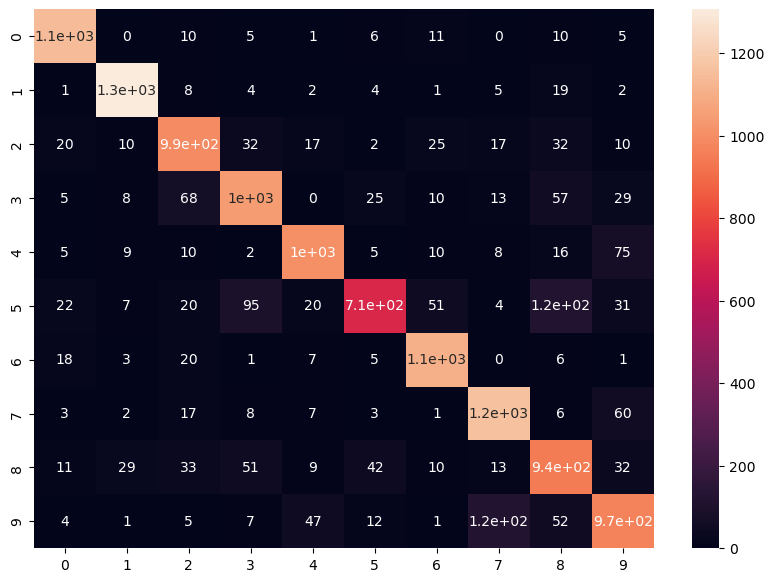

In [9]:
#Visualize performance by confusion matrix
import seaborn as sn
numClasses = 10

conf = np.zeros([numClasses,numClasses])
guesses = model.predict(testX)

for digit in range(len(testy)):
    real = testy[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
    
df_cm = pd.DataFrame(conf, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
    

<AxesSubplot:>

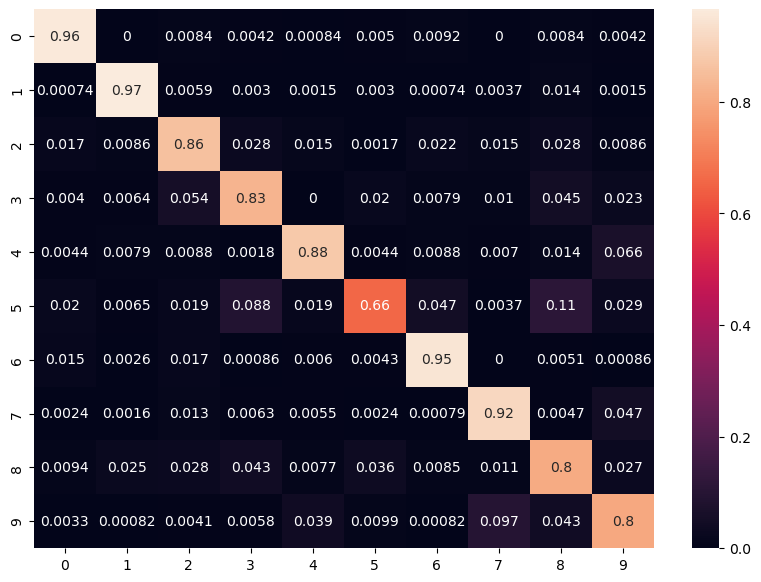

In [10]:
#Visualize performance by Normalized confusion matrix
import seaborn as sn
numClasses = 10

conf = np.zeros([numClasses,numClasses])
guesses = model.predict(testX)

for digit in range(len(testy)):
    real = testy[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
    
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums

df_cm = pd.DataFrame(conf, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
    